
#Deep Learning con Python



### Autor: Erwing FC 

#### ~erwingforerocastro@gmail.com 



#Red neuronal con Keras

A continuación, pasaremos a un nivel más práctico con el ejemplo de reconocimiento de dígitos MNIST presentado en el capítulo anterior; haremos una primera presentación de los pasos que se siguen para entrenar una red neuronal usando la API de Keras. 



In [0]:
#importar las librerias a usar
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical  
from tensorflow import keras 
from tensorflow.keras import layers 


11493376/11490434 [==============================] - 0s 0us/step
1


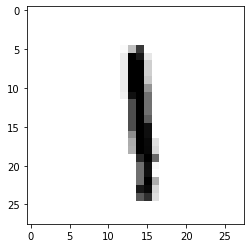

In [2]:
mnist = tf.keras.datasets.mnist 
(x_train, y_train), (x_test, y_test) = mnist.load_data() #traemos los datos de la libreria de mnist y los separamos en entrenamiento y prueba
                                                         #recordar que "y" es el (label) u objetivo que se pretende lograr
                                                         
plt.imshow(x_train[8], cmap=plt.cm.binary)                #mostramos una de las imagenes
print(y_train[8])                                         #su respectivo label 

In [3]:
#mostramos el tensor
print(x_train.ndim) #numero de ejes
print(x_train.shape) #tamaño <60000 matrices de 28x28>
print(x_train.dtype) #tipo de dato

3
(60000, 28, 28)
uint8


In [4]:
#seleccionar y porcionar el conjunto de datos
my_slice = x_train [1:100,:] #tomamos 99 ejemplos de 1 hasta 99
print(my_slice.shape)

# 14 × 14 píxeles en la esquina inferior derecha de todas las imágenes 
my_slice = x_train [:, 14:, 14:] 
print(my_slice.shape) 

# 14 × 14 píxeles en el centro de todas las imágenes 
my_slice = x_train [:, 7:-7, 7:-7] 
print(my_slice.shape)

(99, 28, 28)
(60000, 14, 14)
(60000, 14, 14)


Preprocesado de datos de entrada en una red neuronal

In [5]:
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') #cambiamos los valores a flotante
x_train /= 255                    #normalizamos los vectores 
x_test /= 255                     #ahora la intensidad del píxel es un valor entre 0 y 1

#convertimos las matrices 2D en 1D o vector
x_train = x_train.reshape(60000, 784) 
x_test = x_test.reshape(10000, 784)

#Usaremos lo que se conoce como codificación one-hot 

#antes
print('antes: ',y_test[0]) #el label solo tenia un numero osea era un vector de 60000 enteros de 0 a 9
print('antes: ',y_train[0]) 
print('antes: ',y_train.shape)
print('antes: ',y_test.shape)

#despues 
y_train = to_categorical(y_train, num_classes=10) #agregamos un vector con ceros y un 1 en la posicion del numero
y_test = to_categorical(y_test, num_classes=10) 
print('despues: ',y_test[0])
print('despues: ',y_train[0])
print('despues: ',y_train.shape)
print('despues: ',y_test.shape)

antes:  7
antes:  5
antes:  (60000,)
antes:  (10000,)
despues:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
despues:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
despues:  (60000, 10)
despues:  (10000, 10)


Definicion del modelo

In [6]:
model=keras.Sequential()       #lista de secuencia de dos capas densas, la primera capa se conecta con la siguiente
model.add(layers.Dense(10,activation='sigmoid',input_shape=(784,)))
model.add(layers.Dense(10,activation='softmax')) 
                                                #Una característica muy interesante de la librería de Keras es que deducirá automáticamente 
                                                #la forma de los tensores entre capas después de la primera capa. Esto significa que solo tenemos 
                                                #que establecer esta información para la primera de ellas.
model.summary()    #arquitectura del modelo
#Podemos aprovechar este ejemplo para observar que las capas densas a menudo tienen muchos parámetros. 
#Por ejemplo, en la primera capa, por cada neurona i (entre 0 y 9) requerimos 784 parámetros para los pesos "w", 
#por tanto, 10 x 784 parámetros para almacenar los pesos de las 10 neuronas; además de los 10 parámetros adicionales para los 10 
#sesgos "bj" correspondientes a cada una de ellas. La suma que nos da son los 7850 parámetros que nos muestra el método summary()para la primera capa.


#En la segunda capa, al ser una función softmax, se requiere conectar todas sus 10 
#neuronas con las 10 neuronas de la capa anterior y, por tanto, se requieren 10 x 10 parámetros "w"; 
#además de los 10 sesgosbjcorrespondientes a cada nodo. Esto nos da un total de 110 parámetros que nos muestra el método summary()para la segunda capa. 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics = ['accuracy']) #funcion de coste

Entrenamiento del modelo

In [8]:
model.fit(x_train,y_train,epochs=8) #epochs numero de veces que usaremos todos los datos en el proceso de aprendizaje

Epoch 1/8
1875/1875 [==============================] - 2s 1ms/step - loss: 1.9345 - accuracy: 0.4588
Epoch 2/8
1875/1875 [==============================] - 2s 1ms/step - loss: 1.3302 - accuracy: 0.7186
Epoch 3/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9801 - accuracy: 0.7957
Epoch 4/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7836 - accuracy: 0.8327
Epoch 5/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6643 - accuracy: 0.8539
Epoch 6/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5869 - accuracy: 0.8666
Epoch 7/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5334 - accuracy: 0.8751
Epoch 8/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4945 - accuracy: 0.8819


Evalacion del modelo

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test) #evalu

print('Test precisión:', test_acc)  #precisión
print('Test perdida:', test_loss)  #perdida

313/313 [==============================] - 0s 1ms/step - loss: 0.4671 - accuracy: 0.8890
Test precisión: 0.8889999985694885
Test perdida: 0.4671173691749573


###Matriz de confusion de una clasificación binaria

![texto alternativo](https://docs.microsoft.com/es-es/azure/machine-learning/studio/media/evaluate-model-performance/6a.png)

TP es la cantidad de positivos que fueron clasificados correctamentecomo positivos por el modelo.

•TN es la cantidad de negativos que fueron clasificados correctamentecomo negativos por el modelo.

•FN es la cantidad de positivos que fueron clasificados incorrectamentecomo negativos.

•FP es la cantidad de negativos que fueron clasificados incorrectamentecomo positivos.

---

*Precisión*

Precisión = (TP + TN) / (TP + FP + TN + FN)

*recall que nos indica cómo de bien el modelo evita los falsos negativos:*

recall=(TP) / (P+FN)



Generación de predicciones

In [0]:
#traemos un valor manualmente
imagen=(x_test[11]*25).reshape(28,28)
plt.imshow(imagen, cmap=plt.cm.binary)

#la predicción del valor
predicciones=model.predict(x_test)
print(np.argmax(predicciones[11]))  #argmax trae la posicion con el valor mas alto
print(np.round(predicciones[11],2)) 
print(np.sum(predicciones[11]))     #la suma de los valores es igual a 1